<a href="https://colab.research.google.com/github/Henriquerezer/Breast_cancer/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Aula_svm_n%C3%A3o_linear_rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bibliotecas padrão 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Importação dos dados 
data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/FLAI-Cursos/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Dados/svm.csv')
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1


In [9]:
#Separação entre variaveis preditivas e alvo

X = data.drop('Exited', axis = 1)
y = data['Exited']

# Separação entre treino e teste 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y )

#Pre-processamento utilizando robustScaler

from sklearn.preprocessing import RobustScaler

rs = RobustScaler(quantile_range=(5.,95.))
X_train2 = rs.fit_transform(X_train)
X_test2  = rs.transform(X_test)

#Utilizando gridsearch 

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C' : np.logspace(-7,7,10,base=2), #indicado procurar o parâmetro C em escala log
    'gamma' : np.logspace(-7,3,10,base=2),
    'class_weight' : [None, 'balanced'],


}

svc = SVC(kernel='rbf', probability=True, random_state = 42)

grid = GridSearchCV(svc, params, cv = 10, scoring = 'roc_auc', verbose = 10)




In [12]:
grid.fit(X_train2, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3; 1/200] START C=0.0078125, class_weight=None, gamma=0.0078125...........
[CV 1/3; 1/200] END C=0.0078125, class_weight=None, gamma=0.0078125;, score=0.515 total time=   3.6s
[CV 2/3; 1/200] START C=0.0078125, class_weight=None, gamma=0.0078125...........
[CV 2/3; 1/200] END C=0.0078125, class_weight=None, gamma=0.0078125;, score=0.516 total time=   3.3s
[CV 3/3; 1/200] START C=0.0078125, class_weight=None, gamma=0.0078125...........
[CV 3/3; 1/200] END C=0.0078125, class_weight=None, gamma=0.0078125;, score=0.529 total time=   3.4s
[CV 1/3; 2/200] START C=0.0078125, class_weight=None, gamma=0.01687593342019228.
[CV 1/3; 2/200] END C=0.0078125, class_weight=None, gamma=0.01687593342019228;, score=0.712 total time=   3.4s
[CV 2/3; 2/200] START C=0.0078125, class_weight=None, gamma=0.01687593342019228.
[CV 2/3; 2/200] END C=0.0078125, class_weight=None, gamma=0.01687593342019228;, score=0.747 total time=   3.3s
[CV 3/3

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': array([7.81250000e-03, 2.29646014e-02, 6.75037337e-02, 1.98425131e-01,
       5.83264520e-01, 1.71448797e+00, 5.03968420e+00, 1.48139954e+01,
       4.35452800e+01, 1.28000000e+02]),
                         'class_weight': [None, 'balanced'],
                         'gamma': array([7.81250000e-03, 1.68759334e-02, 3.64540325e-02, 7.87450656e-02,
       1.70098750e-01, 3.67433623e-01, 7.93700526e-01, 1.71448797e+00,
       3.70349885e+00, 8.00000000e+00])},
             scoring='roc_auc', verbose=10)

In [13]:
grid.best_params_

{'C': 43.54528000558007,
 'class_weight': 'balanced',
 'gamma': 0.07874506561842957}

# **Métricas**

0.8618370888393956


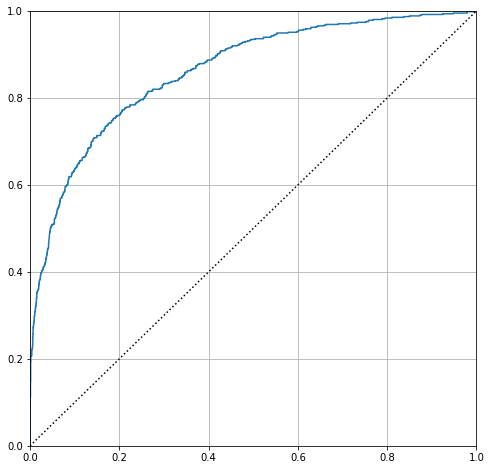

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

print(roc_auc_score(y_test, grid.predict_proba(X_test2)[:,1]))
fpr, tpr, tns = roc_curve(y_test, grid.predict_proba(X_test2)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot((0,1),(0,1), 'k:')
plt.grid();

[0.03732142 0.12142979 0.05801483 ... 0.43983473 0.45427153 0.0129237 ]


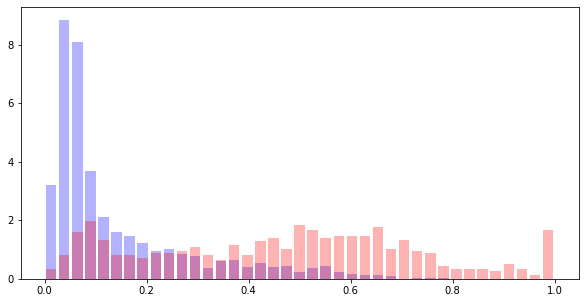

In [16]:
pred = grid.predict_proba(X_test2)[:,1]
print(pred)

plt.figure(figsize=(10,5))
plt.hist(pred[y_test==0], color = 'blue', density = True, alpha = 0.3, rwidth = 0.8, bins = np.linspace(0,1,40))
plt.hist(pred[y_test==1], color = 'red', density = True, alpha = 0.3, rwidth = 0.8, bins = np.linspace(0,1,40));